In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

/home/sonya/Documents/projet_perso/hugging_face/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Vérifier si CUDA est disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Afficher l'appareil d'exécution
print(f'Le modèle est exécuté sur : {device}')

Le modèle est exécuté sur : cuda


In [3]:

ds = load_dataset("mteb/biorxiv-clustering-s2s")

In [4]:
ds

DatasetDict({
    test: Dataset({
        features: ['sentences', 'labels'],
        num_rows: 53787
    })
})

In [5]:
ds['test'][0]

{'sentences': 'PMCE: efficient inference of expressive models of cancer evolution with high prognostic power',
 'labels': 'bioinformatics'}

In [6]:
ds['test'][0]['labels']

'bioinformatics'

In [7]:
for i in range (10):
    print(ds['test'][i])


{'sentences': 'PMCE: efficient inference of expressive models of cancer evolution with high prognostic power', 'labels': 'bioinformatics'}
{'sentences': 'Convergent evolution of primate testis transcriptomes reflects mating strategy', 'labels': 'evolutionary biology'}
{'sentences': 'A max-margin model for predicting residue-base contacts in protein-RNA interactions', 'labels': 'bioinformatics'}
{'sentences': 'Engineered acetoacetate-inducible whole-cell biosensors based on the AtoSC two-component system', 'labels': 'synthetic biology'}
{'sentences': 'Association of NQO1 C609T (Pro187Ser) with risk of Oral Submucous Fibrosis in Eastern Indian population', 'labels': 'genetics'}
{'sentences': 'Fast gene set enrichment analysis', 'labels': 'bioinformatics'}
{'sentences': 'Immunoecology of species with alternative reproductive tactics and strategies', 'labels': 'evolutionary biology'}
{'sentences': 'Frameshifts and wild-type protein sequences are always highly similar because the genetic co

In [8]:
num_classes = len(set(ds['test']['labels']))
num_classes

26

In [9]:
labels_info = ds['test'].features['labels']
labels_info

Value(dtype='string', id=None)

In [10]:
unique_labels = set(ds['test']['labels'])
unique_labels

{'animal behavior and cognition',
 'biochemistry',
 'bioengineering',
 'bioinformatics',
 'biophysics',
 'cancer biology',
 'cell biology',
 'developmental biology',
 'ecology',
 'epidemiology',
 'evolutionary biology',
 'genetics',
 'genomics',
 'immunology',
 'microbiology',
 'molecular biology',
 'neuroscience',
 'paleontology',
 'pathology',
 'pharmacology and toxicology',
 'physiology',
 'plant biology',
 'scientific communication and education',
 'synthetic biology',
 'systems biology',
 'zoology'}

In [11]:
from collections import Counter 

labels = ds['test']['labels']
labels

['bioinformatics',
 'evolutionary biology',
 'bioinformatics',
 'synthetic biology',
 'genetics',
 'bioinformatics',
 'evolutionary biology',
 'genetics',
 'bioinformatics',
 'evolutionary biology',
 'genetics',
 'bioinformatics',
 'bioinformatics',
 'plant biology',
 'neuroscience',
 'neuroscience',
 'zoology',
 'biophysics',
 'developmental biology',
 'cell biology',
 'neuroscience',
 'plant biology',
 'neuroscience',
 'cell biology',
 'bioengineering',
 'plant biology',
 'bioinformatics',
 'microbiology',
 'genetics',
 'neuroscience',
 'ecology',
 'biochemistry',
 'neuroscience',
 'genomics',
 'plant biology',
 'microbiology',
 'bioinformatics',
 'synthetic biology',
 'synthetic biology',
 'synthetic biology',
 'animal behavior and cognition',
 'cancer biology',
 'evolutionary biology',
 'biophysics',
 'microbiology',
 'evolutionary biology',
 'bioinformatics',
 'bioinformatics',
 'bioinformatics',
 'neuroscience',
 'genetics',
 'immunology',
 'scientific communication and education

In [12]:
labels_counts = Counter(labels)
labels_counts

Counter({'neuroscience': 9821,
         'microbiology': 5368,
         'bioinformatics': 4324,
         'cell biology': 3179,
         'biophysics': 2700,
         'immunology': 2632,
         'evolutionary biology': 2548,
         'ecology': 2467,
         'genomics': 2423,
         'biochemistry': 2167,
         'cancer biology': 2105,
         'molecular biology': 2094,
         'plant biology': 2005,
         'developmental biology': 1720,
         'genetics': 1668,
         'bioengineering': 1626,
         'systems biology': 1078,
         'physiology': 936,
         'animal behavior and cognition': 816,
         'pharmacology and toxicology': 634,
         'synthetic biology': 480,
         'pathology': 364,
         'zoology': 297,
         'scientific communication and education': 245,
         'paleontology': 86,
         'epidemiology': 4})

In [13]:
import pandas as pd  

df_test = pd.DataFrame(ds['test'])
df_test.sample(10)

,sentences,labels
48677,HCLC-FC: a novel statistical method for phenom...,bioinformatics
51063,A subtype of melanopsin ganglion cells encodes...,neuroscience
30687,Newly developed MAGIC population allows identi...,genetics
15595,Cold-triggered induction of ROS- and raffinose...,plant biology
28742,Integration of whole genome sequencing and tra...,genomics
10724,Evaluating the role of reference-genome phylog...,evolutionary biology
13560,Neurogenesis-induced forgetting is associated ...,neuroscience
25863,Clinical and molecular features of acquired re...,cancer biology
21914,MARCO+ lymphatic endothelial cells sequester a...,immunology
15345,Loss of Usp22 enhances histone H2B monoubiquit...,immunology


In [14]:
df_test.duplicated().sum()

12

In [15]:
duplicated = df_test[df_test.duplicated()]
duplicated

,sentences,labels
9588,The effect of hydrophobic gases on the nervous...,neuroscience
11152,Glucose decoration on wall-teichoic acid is re...,microbiology
11897,Using machine learning and big data to explore...,bioinformatics
12230,Progressive domain segregation in early embryo...,developmental biology
20675,Beyond category-supervision: instance-level co...,neuroscience
24003,Implications of Spike-glycoprotein processing ...,biochemistry
25839,Egg size variation in a long-lived polyandrous...,evolutionary biology
28473,Does plant diversity determine the diversity o...,microbiology
30273,MTCL2 promotes asymmetric microtubule organiza...,cell biology
46183,Measuring drift by mean deviation: unequal bre...,evolutionary biology


In [16]:
df_test.drop_duplicates()

,sentences,labels
0,PMCE: efficient inference of expressive models...,bioinformatics
1,Convergent evolution of primate testis transcr...,evolutionary biology
2,A max-margin model for predicting residue-base...,bioinformatics
3,Engineered acetoacetate-inducible whole-cell b...,synthetic biology
4,Association of NQO1 C609T (Pro187Ser) with ris...,genetics
...,...,...
53782,MPZ-T124M mouse model replicates human axonopa...,neuroscience
53783,The endothelial-specific LINC00607 mediates en...,molecular biology
53784,The IPDGC/GP2 Hackathon - an open science even...,genetics
53785,Chromosome-scale assembly of the lablab genome...,genomics


In [17]:
df_test.isna().sum()

sentences    0
labels       0
dtype: int64

In [18]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression des espaces blancs
    text = text.strip()
    # Suppression des mots vides
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df_test['sentences'] = df_test['sentences'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /home/sonya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sonya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Calculer la longueur des phrases (nombre de mots)
df_test['word_count'] = df_test['sentences'].apply(lambda x: len(word_tokenize(x)))
df_test['word_count'].describe(percentiles = [0.78,0.80,0.82,0.85,0.87,0.90,0.93,0.95,0.97,0.98,0.99])


[nltk_data] Downloading package punkt to /home/sonya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


count    53787.000000
mean        10.283637
std          3.306206
min          1.000000
50%         10.000000
78%         12.000000
80%         13.000000
82%         13.000000
85%         13.100000
87%         14.000000
90%         15.000000
93%         15.000000
95%         16.000000
97%         17.000000
98%         18.000000
99%         20.000000
max         57.000000
Name: word_count, dtype: float64

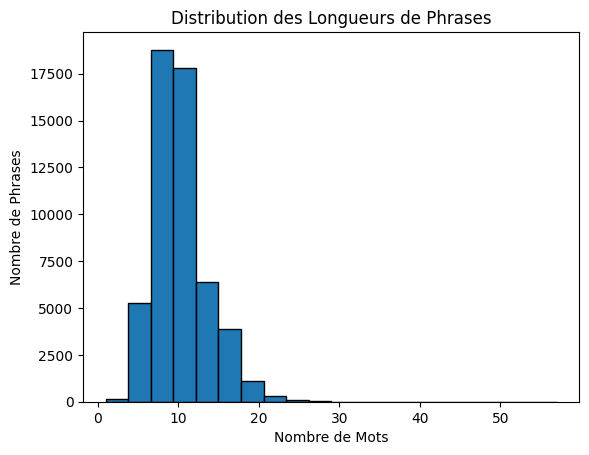

In [20]:
import matplotlib.pyplot as plt

# Exemple de visualisation de la distribution des longueurs de phrases
plt.hist(df_test['word_count'], bins=20, edgecolor='black')
plt.xlabel('Nombre de Mots')
plt.ylabel('Nombre de Phrases')
plt.title('Distribution des Longueurs de Phrases')
plt.show()

In [21]:
# Identifier les phrases avec une longueur maximale dépassant 20 mots
outliers = df_test[df_test['word_count'] > 20]['sentences']
print(outliers.count())

# Afficher quelques phrases identifiées comme outliers
for sentence in outliers.sample(min(5, len(outliers))):  # Afficher au maximum 2 phrases 
    print(sentence)

451
saccades, attentional orienting disengagement: effects anodal tdcs right posterior parietal cortex (ppc) frontal eye field (fef)
four new species cichlidogyrus (platyhelminthes, monogenea, dactylogyridae) lake victoria haplochromine cichlid fishes, redescription c. bifurcatus c. longipenis
programmed axon death executor sarm1 multi-functional nad(p)ase prominent base exchange activity, regulated physiological levels nmn, nad, nadp metabolites
physical geography, isolation distance environmental variables shape genomic variation wild barley (hordeum vulgare l. ssp. spontaneum southern levant
six-months, long acting, one-shot injectable formulation ivermectin complementary malaria vector control tool target zoophagic anopheles : laboratory model-based proofs concept.


In [22]:
# Segmenter les phrases avec une longueur totale de mots supérieure à 20
max_words_per_segment = 20  # Nombre maximum de mots par segment

def segment_long_sentences(sentence):
    words = sentence.split()
    if len(words) > 20:
        segmented = [words[i:i+max_words_per_segment] for i in range(0, len(words), max_words_per_segment)]
        return segmented
    else:
        return [sentence]  # Conserver la phrase non segmentée si elle a 20 mots ou moins

df_test['sentences'] = df_test['sentences'].apply(lambda x: segment_long_sentences(x)[0])

# Afficher le DataFrame avec les phrases segmentées
print(df_test[['sentences']])

                                               sentences
0      pmce: efficient inference expressive models ca...
1      convergent evolution primate testis transcript...
2      max-margin model predicting residue-base conta...
3      engineered acetoacetate-inducible whole-cell b...
4      association nqo1 c609t (pro187ser) risk oral s...
...                                                  ...
53782  mpz-t124m mouse model replicates human axonopa...
53783  endothelial-specific linc00607 mediates endoth...
53784  ipdgc/gp2 hackathon - open science event train...
53785  chromosome-scale assembly lablab genome - mode...
53786  spseudomap: cell type mapping spatial transcri...

[53787 rows x 1 columns]


In [24]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Définir le nom du modèle pré-entraîné
model_name = 'bert-base-uncased'

# Charger le modèle pré-entraîné BERT pour la classification de séquences
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=26)

# Charger le tokenizer associé
tokenizer = BertTokenizer.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
df_test.sample(5)

,sentences,labels,word_count
28166,deep graph learning inter-protein contacts,bioinformatics,5
46918,"thermal regime parental sexual maturation, off...",evolutionary biology,18
21533,dual roles novel oncolytic viral vector-based ...,microbiology,14
48632,corticotropin-releasing hormone signaling pref...,neuroscience,11
2389,dense poly(ethylene glycol) coatings maximize ...,bioengineering,19


In [26]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Tokenization des textes
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in df_test['sentences']]

# Ajouter des paddings pour rendre toutes les séquences de même longueur
max_len = max(len(tokens) for tokens in tokenized_texts)
padded_texts = torch.tensor([tokens + [0] * (max_len - len(tokens)) for tokens in tokenized_texts])

# Exemple : Convertir des étiquettes textuelles en entiers
label_encoder = LabelEncoder()
df_test['labels'] = label_encoder.fit_transform(df_test['labels'])

# Convertir les labels en tenseurs
labels = torch.tensor(df_test['labels'].values)

# Diviser les données en ensembles d'entraînement, de validation et de test
train_texts, test_texts, train_labels, test_labels = train_test_split(padded_texts, labels, test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)  # 10% pour validation


# Créer des DataLoader pour gérer les données en batches
batch_size = 16
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_texts, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(val_texts, val_labels)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

test_dataset = TensorDataset(test_texts, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Tailles des ensembles de données
print(f'Taille de l\'ensemble d\'entraînement : {len(train_dataset)}')
print(f'Taille de l\'ensemble de validation : {len(val_dataset)}')
print(f'Taille de l\'ensemble de test : {len(test_dataset)}')

Taille de l'ensemble d'entraînement : 38726
Taille de l'ensemble de validation : 4303
Taille de l'ensemble de test : 10758


In [27]:
from transformers import BertTokenizer, BertModel, AdamW, BertForSequenceClassification
# Paramètres d'entraînement
epochs = 10
learning_rate = 2e-5

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Entraînement
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    
    for batch in train_loader:
        input_ids, labels = batch[0].to(device), batch[1].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    avg_train_loss = total_train_loss / len(train_loader)

# Évaluation sur l'ensemble de validation a chaque epoch
model.eval()
total_val_loss = 0

with torch.no_grad():
        for batch in val_loader:
            input_ids, labels = batch[0].to(device), batch[1].to(device)
            
            outputs = model(input_ids, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()

avg_val_loss = total_val_loss / len(val_loader)
    
print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')


/home/sonya/Documents/projet_perso/hugging_face/.venv/lib/python3.9/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1/10, Train Loss: 1.7611
Epoch 2/10, Train Loss: 1.3059
Epoch 3/10, Train Loss: 1.0545
Epoch 4/10, Train Loss: 0.8178
Epoch 5/10, Train Loss: 0.6096
Epoch 6/10, Train Loss: 0.4400
Epoch 7/10, Train Loss: 0.3168
Epoch 8/10, Train Loss: 0.2340
Epoch 9/10, Train Loss: 0.1786
Epoch 10/10, Train Loss: 0.1467
Validation Loss: 2.3338


In [28]:
# Évaluation sur l'ensemble de test
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, labels = batch[0].to(device), batch[1].to(device)
        
        outputs = model(input_ids)
        logits = outputs.logits
        
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

# Calcul de l'accuracy sur l'ensemble de test
correct = sum([1 if pred == true else 0 for pred, true in zip(predictions, true_labels)])
accuracy = correct / len(predictions)
print(f'Accuracy on test set: {accuracy:.4f}')


Accuracy on test set: 0.5600
